In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_thesis_dataset.csv')

In [3]:
df.head()

,Age,Financial Status,Has a Laptop,Type of Internet Connection,CC100,CC101,CC102,CS111/IT112,English Prof,Reading Compre,...,TVL-HE,TVL-ICT,Female,Male,Prefer not to say,2018,2019,2020,2021,label
0,22,5,2,2,7,6,6,7,41.05,30.03,...,0,1,0,1,0,1,0,0,0,0
1,24,1,2,1,3,2,6,5,61.05,48.40,...,0,1,0,1,0,1,0,0,0,1
2,21,1,2,2,9,7,7,7,49.95,71.99,...,0,0,1,0,0,1,0,0,0,1
3,22,0,0,2,6,9,2,8,89.71,77.12,...,0,0,0,1,0,1,0,0,0,1
4,23,1,2,2,8,9,7,8,95.51,71.99,...,0,1,1,0,0,1,0,0,0,1


In [4]:
df.shape

(428, 30)

In [5]:
df.columns

Index(['Age', 'Financial Status', 'Has a Laptop',
       'Type of Internet Connection', 'CC100', 'CC101', 'CC102', 'CS111/IT112',
       'English Prof', 'Reading Compre', 'Science Process', 'Quantitative',
       'Abstract', 'CET OAPR', 'SHS/HS GPA', 'ABM/BAM', 'GAS', 'HUMSS', 'STEM',
       'Sports Track', 'TVL-HE', 'TVL-ICT', 'Female', 'Male',
       'Prefer not to say', '2018', '2019', '2020', '2021', 'label'],
      dtype='object')

In [6]:
features = df.columns[:29]
features

Index(['Age', 'Financial Status', 'Has a Laptop',
       'Type of Internet Connection', 'CC100', 'CC101', 'CC102', 'CS111/IT112',
       'English Prof', 'Reading Compre', 'Science Process', 'Quantitative',
       'Abstract', 'CET OAPR', 'SHS/HS GPA', 'ABM/BAM', 'GAS', 'HUMSS', 'STEM',
       'Sports Track', 'TVL-HE', 'TVL-ICT', 'Female', 'Male',
       'Prefer not to say', '2018', '2019', '2020', '2021'],
      dtype='object')

In [7]:
target = df.columns[-1:]
target

Index(['label'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


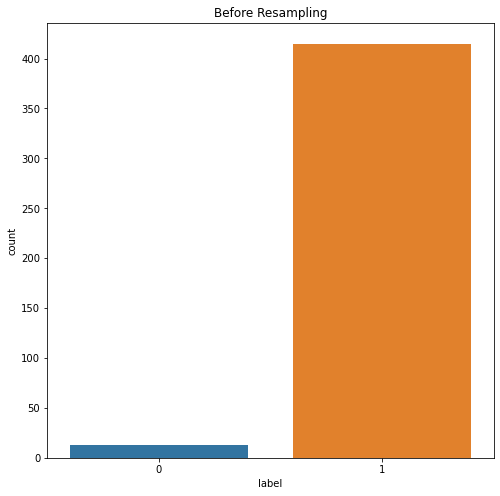

In [8]:
plt.figure(figsize=(8, 8))
sns.countplot(df['label'], data=df)
plt.title('Before Resampling')
plt.show()

In [9]:
df.label.value_counts()

1    415
0     13
Name: label, dtype: int64

## Training and Testing of dataset with 90:10 split of train and test data

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.1, random_state=0, stratify=df['label'])

In [11]:
# Load the dataset
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

#Balance dataset using SMOTE (Oversampling)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [12]:
# describes info about train and test set
print('Oversampling Train Data:')
print("X_train dataset: ", X_train_smote.shape)
print("y_train dataset: ", y_train_smote.shape)
print('*********************************')
print('Test Data:')
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

Oversampling Train Data:
X_train dataset:  (746, 29)
y_train dataset:  (746, 1)
*********************************
Test Data:
X_test dataset:  (43, 29)
y_test dataset:  (43, 1)


In [13]:
y_test.value_counts()

label
1        42
0         1
dtype: int64

## Spot Check Algorithms and Evaluation Metrics

In [14]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from numpy import mean
from numpy import std
import numpy as np
import math

### Include Stacking and Bagging Ensemble in building models

In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote.values.ravel())
predicted = dt.predict(X_test)
print('\nAlgorithm: Decision Tree')
res_cm = confusion_matrix(y_test, predicted)
print('Confusion Matrix:\n',res_cm)
res_acc = accuracy_score(y_test, predicted)
print('Accuracy:',res_acc)
print(classification_report(y_test, predicted, digits=3))
res_auc_roc_score = roc_auc_score(y_test, predicted)
print('AUC-ROC Score: {:.3f}'.format(res_auc_roc_score))
print('\n******************************************************')


Algorithm: Decision Tree
Confusion Matrix:
 [[ 1  0]
 [ 2 40]]
Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

           0      0.333     1.000     0.500         1
           1      1.000     0.952     0.976        42

    accuracy                          0.953        43
   macro avg      0.667     0.976     0.738        43
weighted avg      0.984     0.953     0.965        43

AUC-ROC Score: 0.976

******************************************************


## Batch Prediction

In [16]:
# test the model saved as a pickle
import pickle
test_model = pickle.load(open('thesis_model.pkl','rb'))

In [17]:
X_test.shape, y_test.shape

((43, 29), (43, 1))

In [47]:
# select random data from test dataset
new_xdata = X_test.sample(40)
new_ydata = y_test['label'].loc[new_xdata.index.values]
print(new_xdata)
print(new_ydata)

     Age  Financial Status  Has a Laptop  Type of Internet Connection  CC100  \
117   21                 2             2                            2      6   
246   21                 2             2                            2      6   
176   23                 0             2                            2      9   
153   20                 0             0                            1      9   
187   23                 0             2                            2      7   
149   20                 2             2                            2      5   
409   19                 1             2                            2      6   
380   20                 1             1                            1      5   
199   22                 1             1                            2      1   
101   22                 0             2                            2      6   
345   20                 0             0                            1      3   
195   20                 2             2

In [48]:
pred = test_model.predict(new_xdata)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0]


In [49]:
print(new_ydata.values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [50]:
table = pd.DataFrame({'Prediction': pred, 'True Value': new_ydata.values})
table.head()

,Prediction,True Value
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [51]:
cm = confusion_matrix(table['True Value'], table['Prediction'])

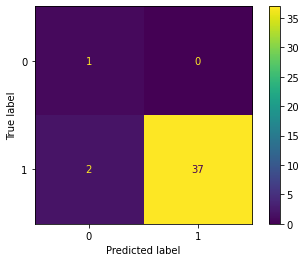

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

dis = ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot()

In [53]:
print(classification_report(table['True Value'], table['Prediction'], digits=3))

              precision    recall  f1-score   support

           0      0.333     1.000     0.500         1
           1      1.000     0.949     0.974        39

    accuracy                          0.950        40
   macro avg      0.667     0.974     0.737        40
weighted avg      0.983     0.950     0.962        40



In [54]:
table[table['True Value'] == 0]

,Prediction,True Value
14,0,0


In [56]:
table[table['Prediction'] == 1]

,Prediction,True Value
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [57]:
new_xdata.iloc[38]

Age                            20.00
Financial Status                1.00
Has a Laptop                    2.00
Type of Internet Connection     1.00
CC100                           7.00
CC101                           6.00
CC102                           7.00
CS111/IT112                     7.00
English Prof                   80.58
Reading Compre                 71.99
Science Process                91.97
Quantitative                   44.18
Abstract                       53.29
CET OAPR                       79.72
SHS/HS GPA                     91.00
ABM/BAM                         0.00
GAS                             0.00
HUMSS                           0.00
STEM                            0.00
Sports Track                    0.00
TVL-HE                          0.00
TVL-ICT                         1.00
Female                          0.00
Male                            0.00
Prefer not to say               1.00
2018                            0.00
2019                            1.00
2

In [28]:
new_xdata.iloc[22]

Age                            22.00
Financial Status                2.00
Has a Laptop                    1.00
Type of Internet Connection     1.00
CC100                           1.00
CC101                           7.00
CC102                           8.00
CS111/IT112                     8.00
English Prof                   70.75
Reading Compre                 54.75
Science Process                85.06
Quantitative                   44.18
Abstract                       26.06
CET OAPR                       66.95
SHS/HS GPA                     86.00
ABM/BAM                         0.00
GAS                             0.00
HUMSS                           1.00
STEM                            0.00
Sports Track                    0.00
TVL-HE                          0.00
TVL-ICT                         0.00
Female                          1.00
Male                            0.00
Prefer not to say               0.00
2018                            0.00
2019                            0.00
2

In [29]:
new_xdata.iloc[25]

Age                            21.00
Financial Status                2.00
Has a Laptop                    2.00
Type of Internet Connection     1.00
CC100                           1.00
CC101                           7.00
CC102                           2.00
CS111/IT112                     0.00
English Prof                   83.47
Reading Compre                 87.40
Science Process                97.72
Quantitative                   44.18
Abstract                       79.78
CET OAPR                       88.22
SHS/HS GPA                     88.50
ABM/BAM                         0.00
GAS                             0.00
HUMSS                           0.00
STEM                            0.00
Sports Track                    0.00
TVL-HE                          0.00
TVL-ICT                         1.00
Female                          0.00
Male                            1.00
Prefer not to say               0.00
2018                            0.00
2019                            1.00
2